In [2]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
!wget 

In [151]:
vocab_size = 10000
embedding_dim = 16
max_length = 200
trunc_type='post'
padding_type='post' 
oov_tok = "<OOV>"
training_size = 700000
total_size = 1000000

In [152]:
# with open("./sarcasm.json", 'r') as f:
#     datastore = json.load(f)

# sentences = []
# labels = []

# for item in datastore:
#     sentences.append(item['headline'])
#     labels.append(item['is_sarcastic'])
#print(list(zip(sentences,labels)))

import pandas as pd

data = pd.read_csv('train-balanced-sarcasm.csv', usecols=['comment','label','score'], index_col=False)
data = data.reindex(columns=['comment','label','score'])
data.dropna(inplace=True)
data = data.sort_values(by='score', ascending=False)
sentences = data['comment']
labels = data['label']
data.head()

,comment,label,score
143497,That's exactly what a country who made up a ho...,1,9070
157472,but it still snows,1,7563
110228,"lol, you can't make this stuff up.",0,5818
53985,He didn't drink the compliance,0,5629
689739,"In the Half Life series, the reason Gordon Fre...",0,5163


RuntimeError: matplotlib does not support generators as input

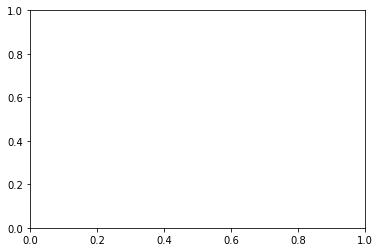

In [153]:
import matplotlib.pyplot as plt
plt.plot(map(len, sentences))
plt.show()

In [154]:
training_sentences = sentences.tolist()[:training_size]
testing_sentences = sentences.tolist()[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]
testing_sentences

['Carrots.',
 'I am disorder, and it really messes with my OCD.',
 'They really need a blank book for atheists though',
 'This is definitely true.',
 'Are you retired?',
 'To bad he retired and they replaced him with his evil twin Zven',
 'Mail?',
 "Wow, healthcare must be expensive if this didn't raise the price of Pizzas.",
 'Liberal as fuck?',
 "I'm watching it now, premise seems interesting but the show runners aren't known for much more than cop procedurals which really shows so far.",
 'America can out of kebab!',
 'Yeah, this is totally reasonable.',
 'Yeah, woodhouse just informed me so I sent a message',
 'Sure :P',
 'yeah but walt is an expert crystal grower, so he was able to do it in a meth lab.',
 'yes, Sips and Duncan are good.',
 'And if the Republicans can help him out, then all the better, amiright?',
 "That Delaney dude is a fuckin' genius",
 'wow your such a saint',
 'How are you not in jail right now for destroying those poor little girls :(',
 'I almost took you se

In [155]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [180]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=4)

In [156]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [157]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [158]:
history = model.fit(training_padded, training_labels, epochs=15, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/15
21875/21875 - 88s - loss: 0.6010 - accuracy: 0.6723 - val_loss: 0.5877 - val_accuracy: 0.6828
Epoch 2/15
21875/21875 - 93s - loss: 0.5706 - accuracy: 0.7038 - val_loss: 0.6003 - val_accuracy: 0.6793
Epoch 3/15
21875/21875 - 88s - loss: 0.5625 - accuracy: 0.7106 - val_loss: 0.5778 - val_accuracy: 0.6958
Epoch 4/15
21875/21875 - 84s - loss: 0.5568 - accuracy: 0.7141 - val_loss: 0.5740 - val_accuracy: 0.6974
Epoch 5/15
21875/21875 - 88s - loss: 0.5526 - accuracy: 0.7172 - val_loss: 0.5819 - val_accuracy: 0.6916
Epoch 6/15
21875/21875 - 83s - loss: 0.5492 - accuracy: 0.7193 - val_loss: 0.5743 - val_accuracy: 0.6971
Epoch 7/15
21875/21875 - 84s - loss: 0.5467 - accuracy: 0.7214 - val_loss: 0.5812 - val_accuracy: 0.6917
Epoch 8/15
21875/21875 - 84s - loss: 0.5444 - accuracy: 0.7228 - val_loss: 0.5751 - val_accuracy: 0.6974
Epoch 9/15
21875/21875 - 91s - loss: 0.5421 - accuracy: 0.7248 - val_loss: 0.5740 - val_accuracy: 0.6990
Epoch 10/15
21875/21875 - 85s - loss: 0.5400 - accuracy

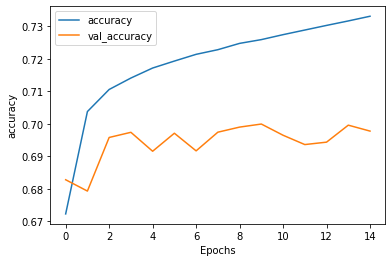

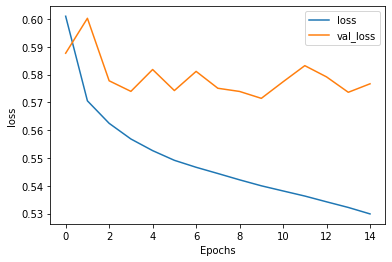

In [159]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [175]:
model.save('model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets


In [176]:
tf.keras.models.load_model('model')

In [177]:
sentence = input("sentence: ")
sequences = tokenizer.texts_to_sequences([sentence])
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print('Sarcasm' if model.predict(padded)[0][0]>0.5 else 'Not Sarcasm')

sentence: omg hax
Sarcasm
